## Model Evaluation and Interpretation

This notebook evaluates the trained solar power forecasting model, analyzes feature importance, and provides plots for use in the Streamlit app.

### 1. Import Required Libraries

Import all necessary libraries for model evaluation, feature importance, and plotting.

In [10]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay, permutation_importance

### 2. Load Trained Model and Data

Load the trained model and the processed feature dataset.

In [11]:
MODEL_PATH = "../models/final_model.joblib"
FEATURES_PATH = "../data/processed/solar_features.csv"

model = joblib.load(MODEL_PATH)
df = pd.read_csv(FEATURES_PATH)

### 3. Prepare Features and Target

Split the DataFrame into features (X) and target (y).

In [12]:
X = df.drop(columns=["power_generated_kw"])
y = df["power_generated_kw"]

### 4. Calculate and Display Feature Importance

Check if the model exposes `feature_importances_`. If not, use permutation importance. Display the top 10 features.

In [13]:
# Calculate feature importance
if hasattr(model, "feature_importances_"):
    importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
else:
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42, scoring="neg_mean_absolute_error")
    importance = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)

print("Top 10 Feature Importances:")
display(importance.head(10))

Top 10 Feature Importances:


first_hour_of_period_cos      0.256324
solar_potential               0.245258
distance_to_solar_noon        0.177563
distance_to_noon_squared      0.126526
sky_cover                     0.067554
is_daylight                   0.028372
day_of_year_cos               0.025091
relative_humidity             0.015568
first_hour_of_period_sin      0.014971
average_wind_direction_day    0.013647
dtype: float64

### 5. Save Feature Importance to CSV

Save the feature importance values for further analysis or use in the Streamlit app.

In [14]:
importance.to_csv("../models/feature_importance.csv")
print("Feature importances saved to ../models/feature_importance.csv")

Feature importances saved to ../models/feature_importance.csv


### 6. Plot Top 10 Feature Importances

Visualize the most important features using a horizontal bar plot.

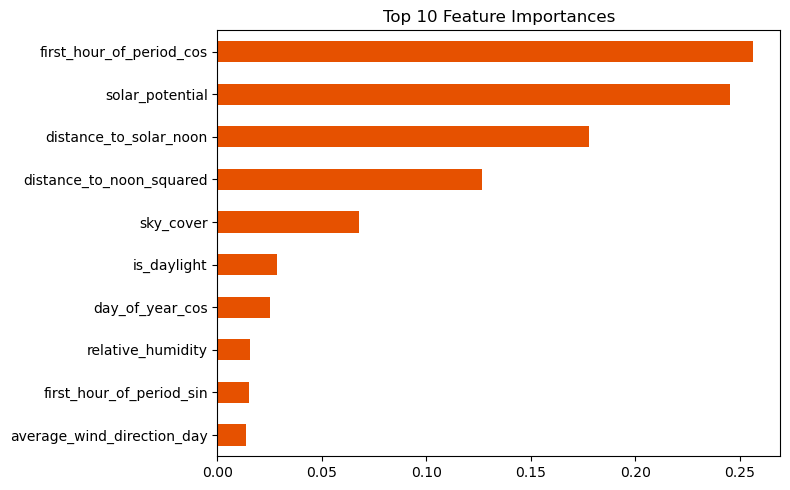

In [15]:
plt.figure(figsize=(8, 5))
importance.head(10).plot(kind="barh", color="#E65100")
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

### 7. Partial Dependence Plots for Selected Features

Generate partial dependence plots for key features to interpret the model.

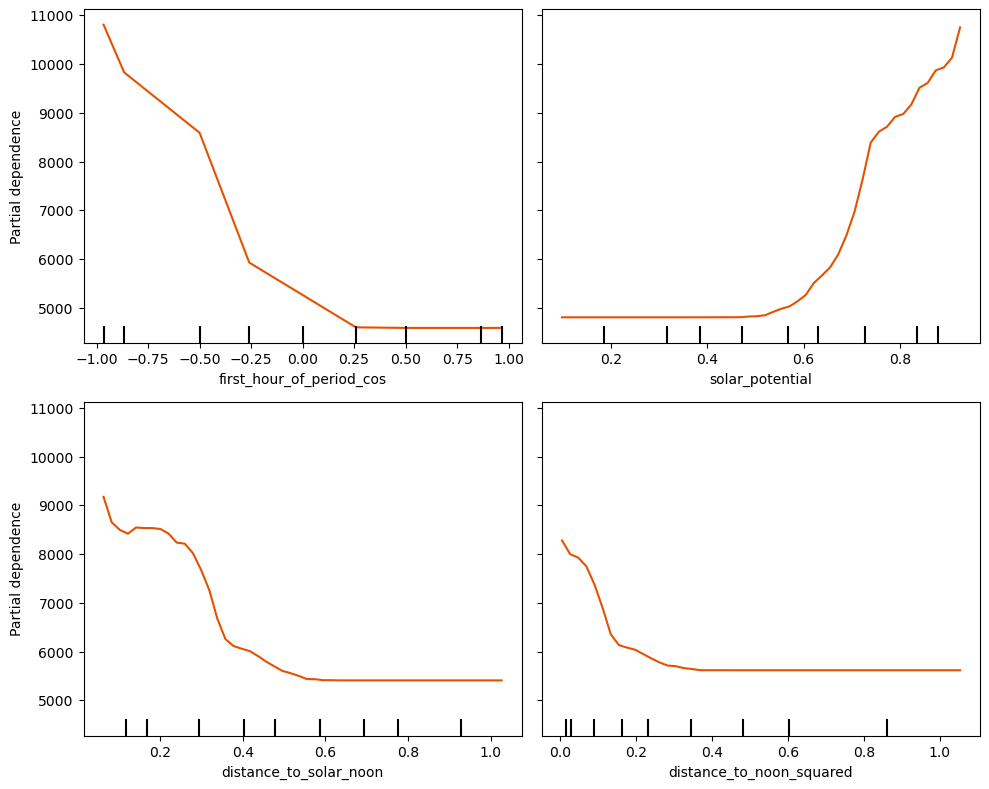

In [26]:
# Select the top 4 most important features for partial dependence plots
features_to_plot = importance.head(4).index.tolist()

# Ensure all selected features are float for partial dependence plots
X_float = X.copy()
for col in features_to_plot:
    X_float[col] = X_float[col].astype(float)

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
disp = PartialDependenceDisplay.from_estimator(
    model,
    X_float,
    features_to_plot,
    grid_resolution=50,
    ax=ax
)
# Set color for all curves
for axis in disp.axes_.ravel():
    for line in axis.get_lines():
        line.set_color("#E65100")
plt.tight_layout()
plt.show()

### 8. Add Custom Plots for Streamlit App

Use the following cell(s) to add any additional plots you want to display in the Streamlit app, such as time series, error distributions, or other visualizations.

In [17]:
# Example: Add your custom Streamlit app plots here
# For example, plot a time series of predictions vs actuals, error distributions, etc.
# You can copy code from your Streamlit app or create new visualizations here.

# Example placeholder:
# plt.figure(figsize=(10, 4))
# plt.plot(y.values, label='Actual')
# plt.plot(model.predict(X), label='Predicted')
# plt.legend()
# plt.title('Actual vs Predicted Power Generation')
# plt.show()